In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import exposure

In [56]:
img = cv2.imread('../images/12.jpg', cv2.IMREAD_COLOR)
print(img.shape)

(635, 842, 3)


In [57]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(imgHSV.shape)

(635, 842, 3)


# H channel

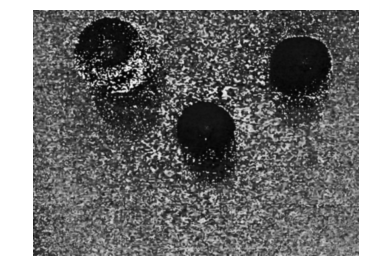

In [58]:
plt.imshow(imgHSV[:, :, 0], cmap = 'gray', interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()

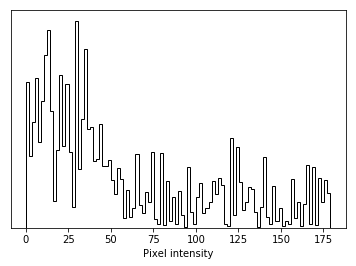

In [59]:
f, ax_hist = plt.subplots()
ax_hist.hist(imgHSV[:, :, 0].ravel(), bins=100, histtype='step', color='black')
ax_hist.set_xlabel('Pixel intensity')
# ax_hist.set_xlim(0,)
ax_hist.set_yticks([])
plt.show()

In [60]:
plt.imshow(imgHSV[:, :, 1], cmap = 'gray', interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()

In [61]:
f, ax_hist = plt.subplots()
ax_hist.hist(imgHSV[:, :, 1].ravel(), bins=100, histtype='step', color='black')
ax_hist.set_xlabel('Pixel intensity')
# ax_hist.set_xlim(0,)
ax_hist.set_yticks([])
plt.show()

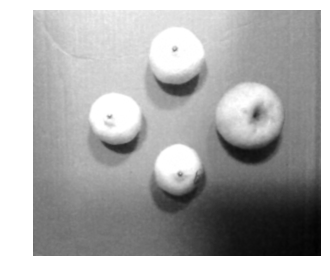

In [46]:
plt.imshow(imgHSV[:, :, 2], cmap = 'gray', interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()

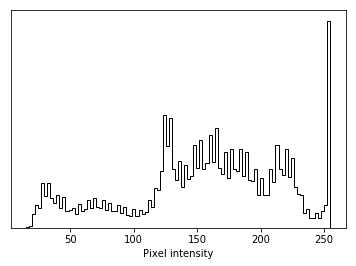

In [47]:
f, ax_hist = plt.subplots()
ax_hist.hist(imgHSV[:, :, 2].ravel(), bins=100, histtype='step', color='black')
ax_hist.set_xlabel('Pixel intensity')
# ax_hist.set_xlim(0,)
ax_hist.set_yticks([])
plt.show()

In [62]:
t = 145
(t, binary) = cv2.threshold(imgHSV[:, :, 1], t, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap = 'gray', interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()

In [63]:
(_, contours, _) = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
len(contours)

209

In [65]:
channel = imgHSV[:, :, 1].copy()
overlay = img.copy()
print(channel.shape)

(635, 842)


In [66]:
avg_len = np.mean([len(c) for c in contours])
print(avg_len)
filtered_contours = [c for c in contours if len(c) >= 100]
print(len(filtered_contours))

11.4784688995
3


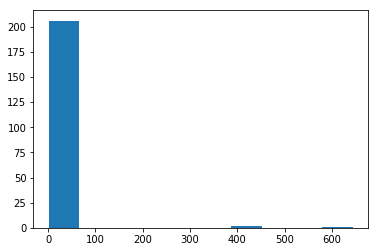

In [67]:
plt.hist([len(c) for c in contours], bins=10)
plt.ylim
plt.show()

In [68]:
overlay = img.copy()
cv2.drawContours(overlay, filtered_contours, -1, (0, 0, 255), 5)

plt.imshow(overlay, interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()

In [71]:
apple = (45, 89, 153)
orange = (31, 81, 164)
import math

def colorDistance(kCol, uCol):
    # compute sum of square of differences between each channel 
    d = (kCol[0] - uCol[0])**2 + (kCol[1] - uCol[1])**2 + \
        (kCol[2] - uCol[2])**2
        
    # square root of sum is the Euclidean distance between the
    # two colors
    return math.sqrt(d)

Contour 0
Contour 1
Contour 2


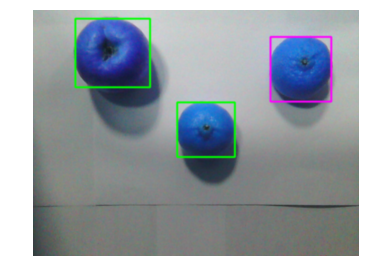

In [73]:
overlay = img.copy()

appleCount = 0
orangeCount = 0

for i, c in enumerate(filtered_contours):
    print('Contour {}'.format(i))
    
    # find centroid of shape
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
        
    # find average color for 9 pixel kernel around centroid
    b = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 0]
    g = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 1]
    r = img[cy - 4 : cy + 5, cx - 4 : cx + 5, 2]
        
    bAvg = np.mean(b)
    gAvg = np.mean(g)
    rAvg = np.mean(r)
    
    # find distances to known reference colors
    dist = []
    dist.append(colorDistance(apple, (bAvg, gAvg, rAvg)))
    dist.append(colorDistance(orange, (bAvg, gAvg, rAvg)))
    
    (x, y, w, h) = cv2.boundingRect(c)
    
    # which one is closest?
    minDist = min(dist)
    # if it was yellow, count the shape
    if dist[0] == minDist:
        # apple green rectangle.
        appleCount += 1
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 255, 0), 3)
    elif dist[1] == minDist:
        # orange - yellow
        orangeCount += 1
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 0, 255), 3)
    
plt.imshow(overlay, interpolation = 'bicubic')
plt.tight_layout()
plt.axis('off')
plt.show()